In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras

# New Section

In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()

In [2]:
!cat /proc/meminfo

MemTotal:       13290480 kB
MemFree:         9782796 kB
MemAvailable:   12078468 kB
Buffers:           63396 kB
Cached:          2433036 kB
SwapCached:            0 kB
Active:           795236 kB
Inactive:        2499532 kB
Active(anon):       1060 kB
Inactive(anon):   798568 kB
Active(file):     794176 kB
Inactive(file):  1700964 kB
Unevictable:          16 kB
Mlocked:              16 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               780 kB
Writeback:             0 kB
AnonPages:        797364 kB
Mapped:           634272 kB
Shmem:              1284 kB
KReclaimable:      82944 kB
Slab:             117752 kB
SReclaimable:      82944 kB
SUnreclaim:        34808 kB
KernelStack:        5504 kB
PageTables:        12672 kB
SecPageTables:         0 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6645240 kB
Committed_AS:    2821184 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       11792 kB
VmallocChunk:    

In [ ]:
all_images = np.concatenate((x_train, x_test), axis=0)
all_labels = np.concatenate([y_train, y_test])


In [ ]:
all_images.shape,all_labels.shape

((70000, 28, 28), (70000,))

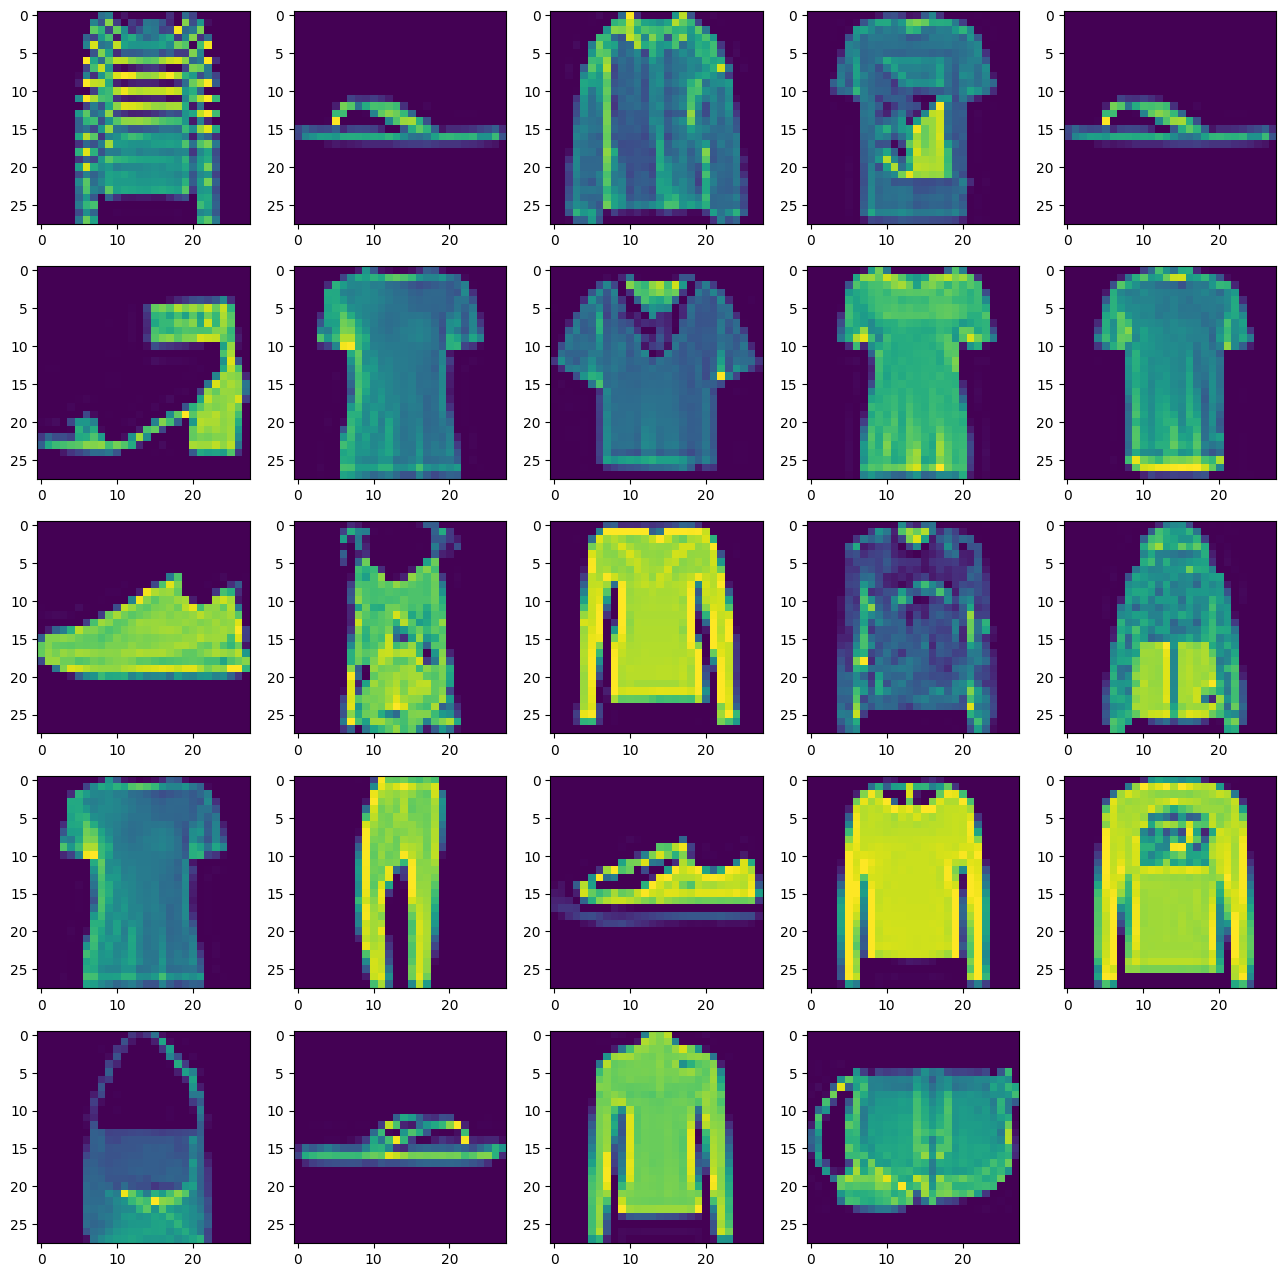

In [ ]:
plt.figure(figsize = (16,16))
j =1
for i in np.random.randint(0,1000,24):
  plt.subplot(5,5,j)
  j=j+1
  plt.imshow(all_images[i])


7


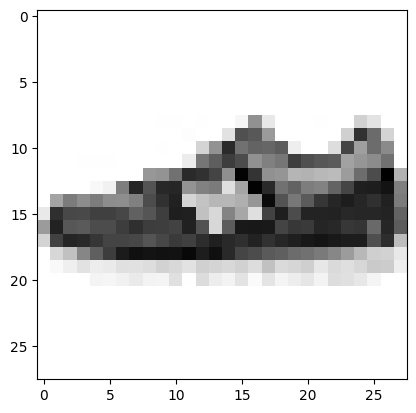

In [ ]:
plt.imshow(x_train[4],cmap = 'Greys')
print(y_train[4])

In [ ]:
# x_train = np.expand_dims(x_train,-1)
# x_test = np.expand_dims(x_test,-1)



In [ ]:
all_images.shape

(70000, 28, 28)

In [ ]:
x_train = all_images/255
y_train = all_labels


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size = 0.2, random_state = 32)


In [ ]:
x_train.shape,x_val.shape

((56000, 28, 28), (14000, 28, 28))

In [ ]:
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((56000, 28, 28), (14000, 28, 28), (56000,), (14000,))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.layers import LeakyReLU

In [ ]:
# create CNN model
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid',strides = 1, activation = 'relu',input_shape=[28,28,1]))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding = 'same'))

model.add(Conv2D(64,kernel_size = (3,3),padding = 'same',strides = 2, activation = 'relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding = 'same'))

model.add(Conv2D(128,kernel_size = (3,3),padding = 'same', strides = 2, activation = 'relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding = 'same'))

model.add(Flatten())

model.add(Dense(256, activation = 'LeakyReLU'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'LeakyReLU'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'LeakyReLU'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'LeakyReLU'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'LeakyReLU'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))




In [ ]:

# """# Convolutional Neural Network - Model Building"""

# #Building CNN model
# cnn_model = keras.models.Sequential([
#                          keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
#                          keras.layers.MaxPooling2D(pool_size=(2,2)),
#                          keras.layers.Flatten(),
#                          keras.layers.Dense(units=128, activation='relu'),
#                          keras.layers.Dense(units=10, activation='softmax')
# ])

# cnn_model.summary() # get the summary of model

# # complie the model
# cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

# # train cnn model
# cnn_model.fit(x_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(x_val, y_val))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 1, 128)        

In [ ]:

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
x_train

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.01176471, ..., 0.        ,
         0.00784314, 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.00784314,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(x_val, y_val))

Epoch 1/50
110/110 [==============================] - 5s 18ms/step - loss: 1.2448 - accuracy: 0.5049 - val_loss: 0.5959 - val_accuracy: 0.7636
Epoch 2/50
110/110 [==============================] - 2s 14ms/step - loss: 0.6050 - accuracy: 0.7770 - val_loss: 0.4449 - val_accuracy: 0.8314
Epoch 3/50
110/110 [==============================] - 1s 11ms/step - loss: 0.4899 - accuracy: 0.8263 - val_loss: 0.3814 - val_accuracy: 0.8604
Epoch 4/50
110/110 [==============================] - 1s 11ms/step - loss: 0.4208 - accuracy: 0.8531 - val_loss: 0.3386 - val_accuracy: 0.8730
Epoch 5/50
110/110 [==============================] - 1s 11ms/step - loss: 0.3704 - accuracy: 0.8706 - val_loss: 0.3149 - val_accuracy: 0.8829
Epoch 6/50
110/110 [==============================] - 1s 11ms/step - loss: 0.3447 - accuracy: 0.8810 - val_loss: 0.2944 - val_accuracy: 0.8921
Epoch 7/50
110/110 [==============================] - 2s 14ms/step - loss: 0.3225 - accuracy: 0.8881 - val_loss: 0.2975 - val_accuracy: 0.8911

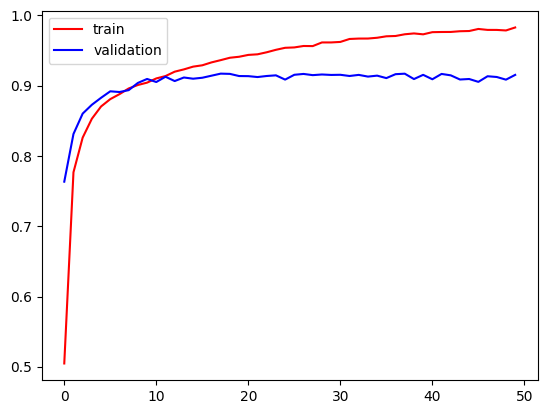

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
test_img = cv2.imread('/content/sneakerss.png')

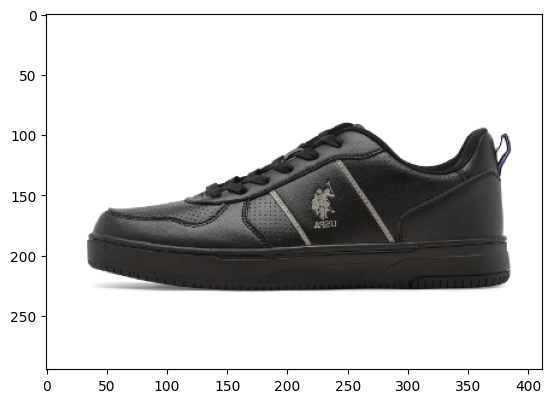

In [ ]:
plt.imshow(test_img)

In [ ]:
from PIL import Image
import numpy as np

# Assuming test_img is a PIL Image
test_img = Image.open("/content/sneakerss.png").convert("L")
test_img = np.array(test_img)

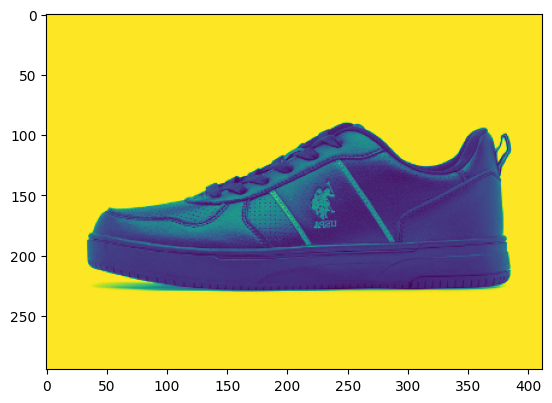

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img = cv2.resize(test_img,(28,28))

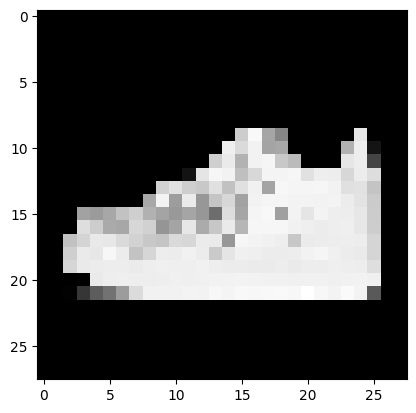

In [ ]:
plt.imshow(test_img,cmap = 'Greys')

In [ ]:
from PIL import Image
import numpy as np

# Assuming test_img is a PIL Image
test_img = Image.open("/content/sneakerss.png").convert("L")
test_img = np.array(test_img)

In [ ]:
test_img.shape

(295, 412)

In [ ]:
test_img = cv2.resize(test_img,(28,28))

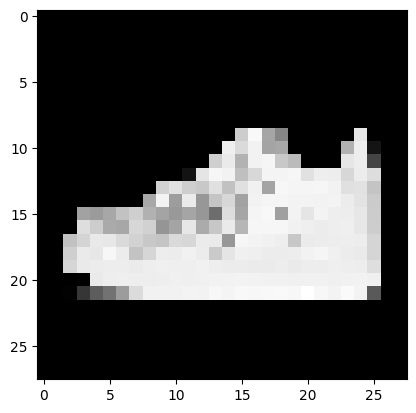

In [ ]:
plt.imshow(test_img,cmap = 'Greys')

In [ ]:

test_input = test_img.reshape((1,28, 28, 1))

TypeError: ignored

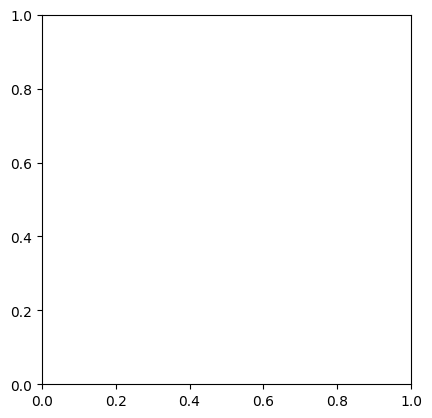

In [ ]:
plt.imshow(test_input)

In [ ]:
prediction = model.predict(test_input)
prediction

1/1 [==============================] - 0s 28ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

# New Section

In [ ]:
np.argmax(prediction)

8

In [ ]:
label_maping = {0:'T-shirt/top',
1:'Trouser',
2: 'Pullover',
3: 'Dress',
4: 'Coat',
5: 'Sandal',
6: 'Shirt',
7: 'Sneaker',
8: 'Bag',
9: 'Ankle boot'}

In [ ]:
#prediction:
